# Ejercicio Práctico con Pandas

## Objetivo: Explorar y analizar el conjunto de datos de pesos y alturas.
### Parte 1: Exploración Básica del DataFrame

    Cargar el archivo CSV en un DataFrame de Pandas.
    Explorar el DataFrame:
        Mostrar las primeras y últimas 5 filas del DataFrame.
        Obtener información general del DataFrame, como el número de filas, columnas y tipos de datos.
        Calcular estadísticas descriptivas básicas para las columnas numéricas (media, mediana, desviación estándar, mínimos y máximos).

### Parte 2: Limpieza y Preparación de Datos

    Convertir la altura de pulgadas a centímetros.
    Convertir el peso de libras a kilogramos.
    Tratar con valores faltantes (si los hay): Identificar y manejar los valores faltantes en el conjunto de datos.

#### Parte 3: Análisis Exploratorio de Datos

    Agrupar datos por género y calcular el peso medio para cada género.
    Visualización:
        Crear histogramas de las distribuciones de altura y peso.
        Crear un diagrama de caja (boxplot) para comparar la distribución del peso entre géneros.
    Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas.

### Parte 4: Operaciones Avanzadas

    Calcular los percentiles del peso para cada género.
    Crear una nueva columna que clasifique a los individuos como 'Bajo Peso', 'Peso Normal', 'Sobrepeso' o 'Obesidad' basado en su IMC (Índice de Masa Corporal).

### Parte 5: Exportar Resultados

    Guardar los resultados del análisis en un nuevo archivo CSV.

In [1]:
import pandas as pd
URL = "https://drive.google.com/uc?export=download&id=1-zKKm5aEEabJS01n4vZhE8iiacnXYWGg"
df = pd.read_csv(URL)
print(df.head(15).to_string(index=False))

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801
  Male 67.253016 152.212156
  Male 68.785081 183.927889
  Male 68.348516 167.971110
  Male 67.018950 175.929440
  Male 63.456494 156.399676
  Male 71.195382 186.604926
  Male 71.640805 213.741169
  Male 64.766329 167.127461
  Male 69.283070 189.446181
  Male 69.243732 186.434168


Primeras 5 filas:
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

Últimas 5 filas:
      Gender     Height      Weight
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  9998 non-null   float64
 2   Weight  9998 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None

Estadísticas Descriptivas:
            Height       Weight
count  9998.000000  9998.000000
mean     66.366788   161.434302
std       3.847510    32.108770
min      54.263133   

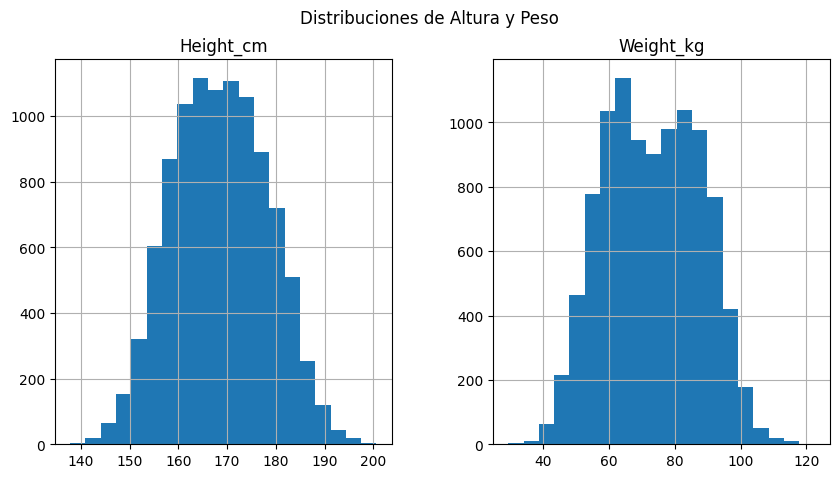

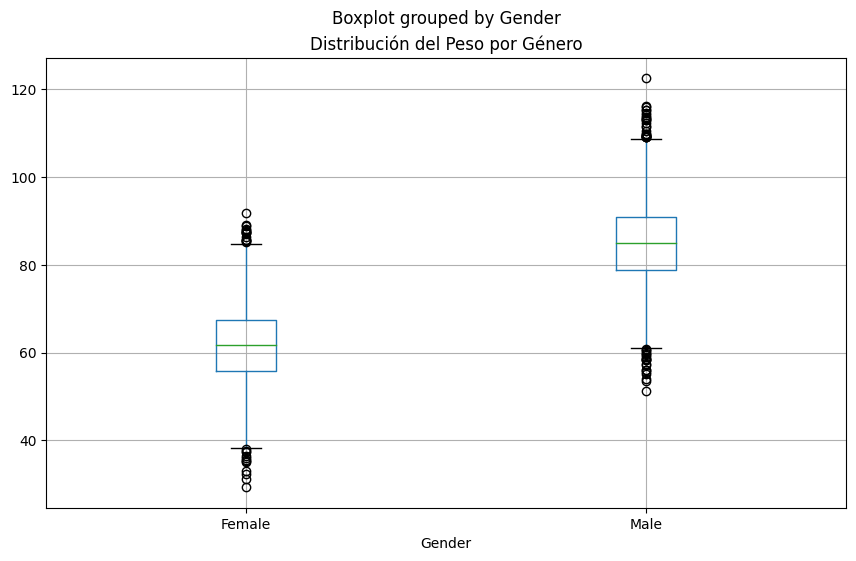


Estadísticas descriptivas para altura entre 160 y 180 cm:
            Height       Weight    Height_cm    Weight_kg
count  6565.000000  6565.000000  6565.000000  6565.000000
mean     66.777998   164.779998   169.616116    74.742889
std       2.183398    22.513848     5.545830    10.212102
min      62.993194    93.424239   160.002712    42.376488
25%      64.909785   146.229436   164.870855    66.328502
50%      66.733634   165.272511   169.503431    74.966289
75%      68.578131   182.796934   174.188454    82.915227
max      70.865815   225.797525   179.999171   102.419951

Percentiles del Peso por Género:
Gender      
Female  0.25    55.761923
        0.50    61.741847
        0.75    67.499446
Male    0.25    78.873644
        0.50    84.834327
        0.75    90.880170
Name: Weight_kg, dtype: float64


In [4]:
import pandas as pd
import numpy as np

# Parte 1: Exploración Básica del DataFrame
#df = pd.read_csv("ruta/del/archivo.csv")  # Asegúrate de cambiar "ruta/del/archivo.csv" con la ruta correcta

# Mostrar las primeras y últimas 5 filas del DataFrame
print("Primeras 5 filas:")
print(df.head())

print("\nÚltimas 5 filas:")
print(df.tail())

# Obtener información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Calcular estadísticas descriptivas básicas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# Parte 2: Limpieza y Preparación de Datos
# Convertir la altura de pulgadas a centímetros
df['Height_cm'] = df['Height'] * 2.54

# Convertir el peso de libras a kilogramos
df['Weight_kg'] = df['Weight'] * 0.453592

# Tratar con valores faltantes
df.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Parte 3: Análisis Exploratorio de Datos
# Agrupar datos por género y calcular el peso medio
mean_weight_by_gender = df.groupby('Gender')['Weight_kg'].mean()
print("\nPeso medio por género:")
print(mean_weight_by_gender)

# Visualización
import matplotlib.pyplot as plt

# Histogramas de las distribuciones de altura y peso
df[['Height_cm', 'Weight_kg']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribuciones de Altura y Peso')
plt.show()

# Diagrama de caja para comparar la distribución del peso entre géneros
df.boxplot(column='Weight_kg', by='Gender', figsize=(10, 6))
plt.title('Distribución del Peso por Género')
plt.show()

# Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas
filtered_data = df[(df['Height_cm'] >= 160) & (df['Height_cm'] <= 180)]
print("\nEstadísticas descriptivas para altura entre 160 y 180 cm:")
print(filtered_data.describe())

# Parte 4: Operaciones Avanzadas
# Calcular percentiles del peso para cada género
percentiles_weight_by_gender = df.groupby('Gender')['Weight_kg'].quantile([0.25, 0.5, 0.75])
print("\nPercentiles del Peso por Género:")
print(percentiles_weight_by_gender)

# Crear una nueva columna clasificando individuos basados en su IMC
df['IMC'] = df['Weight_kg'] / ((df['Height_cm'] / 100) ** 2)
df['Clasificación_IMC'] = np.select(
    [df['IMC'] < 18.5, (df['IMC'] >= 18.5) & (df['IMC'] < 24.9),
     (df['IMC'] >= 25) & (df['IMC'] < 29.9), df['IMC'] >= 30],
    ['Bajo Peso', 'Peso Normal', 'Sobrepeso', 'Obesidad']
)

# Parte 5: Exportar Resultados
df.to_csv("resultados.csv", index=False)
